**Part1:**
Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

**Answer:** The primary objective of this assignment is find a model that will output best prediction results. Along with prediction, I also focus on the model interpretability. 
For best prediction results, I will use different model such as linear regrassion, polynomial regressarion, Ridge and Lesso regression and will evaluate the model performance by performance matrics. For interpretability,
we will investigate and will search the features that dreive the prediction valaue. This will help to find the features that are important than other features. Moreover, the outcomes of linear model are more self explanaatory than polynomial models. 


**Part2:** Brief description of the data set you chose and a summary of its attributes.

**Answer:** I will be using the housing dataset for this assignment. This is a well-known data set, and I downloaded the data set from Kaggle (https://www.kaggle.com/mohamedbakrey/housecsv). The data file is in CSV format. The data set has 18 columns (features) and 1000 rows (examples). Different features have different ranges. The target variable "price" depends on the values of all other variables (features). Some necessary information about some of the important features are given below:


Feature Name  | Data Type | Value Range| Missing value|
--------------|-----------|------------|--------------|
#bedrooms     | Real      |[0,7]       |    Yes
#bathrooms    | Real      |[0,5]       |    Yes
#sqft_living  | Real      |[380, 6070] |    Yes
#sqft_lot     | Real      |[649, 315k] |    Yes
#floors       | Real      |[1,3.5]     |    Yes
#waterfront   | Real      |[0,1]       |    Yes
#view         | Real      |[0,4]       |    Yes
#condition    | Real      |[1,5]       |    Yes
#grad         | Real      |[4,12]      |    Yes
#sqft_above   | Real      |[380, 6070] |    Yes


In [ ]:
#install all dependencies
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#read data
filepath='Data/houses.csv'
data=pd.read_csv(filepath)
df=data
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [ ]:
#print the number of rows
print(df.shape[0])
#print the list of columns
print(df.columns.to_list())
#print the datatype of each column
print(df.dtypes)

1000
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'price']
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
price            float64
dtype: object


In [ ]:
df.isnull().sum().sort_values()

bedrooms         1
long             1
lat              1
zipcode          1
yr_renovated     1
yr_built         1
sqft_basement    1
sqft_above       1
grade            1
condition        1
view             1
waterfront       1
floors           1
sqft_lot         1
sqft_living      1
bathrooms        1
sqft_living15    1
price            1
dtype: int64

**Part3:** Brief summary of data exploration and actions taken for data cleaning and feature engineering.

**Answer:** The initial plan for the data exploration is as follows:

- Read the data from the CSV file and store them in the pandas DataFrame.
- Check the first few examples (rows) from the DataFrame to get an idea about the data and check whether those data make sense or not.
- Check the number of examples, name of all features including the target variable, and their data type format. 
- Check whether data have any duplicate value, missing value, null value.
- Check the mean, 25%, median, 75%, and the range of all features.
- Check the relation of the target variable with the other variable (features).
-Check the distribution of the target variable.

All actions taken for data cleaning and feature engineering are as follows:
 - Check the duplicate and unnecessary data.
 - Handle the missing data. We impute the missing data by replacing the mean of each featre.
 - We used histogram and boxplot to detect outliner data. The data set does not have too many outliers.
 - We choose a set of features to add to the model. We removed some of the feature that does have any relation with target variable.
 - All our features have real data and we do not need to encode any feature.
 - Convert the scale of all features in same range so that they are comparable. Here, for scaling we use Min-max scaling. 
 - For regression, the features need to be normally distributed. So, we calculate the skewness of each feature and use box-cox functions to those feature whose skewness value is higher than a limit.
 - For polynomial features we convert the feature to a higher-order polynomial.
 - We also estimate the multicollinearity among the features.
  

In [ ]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [ ]:
#See the data description
statas_df=df.describe()
statas_df.loc['range']=statas_df.loc['max']-statas_df.loc['min']
out_fields=['mean','25%','50%','75%','range']
statas_df=statas_df.loc[out_fields]
statas_df.rename({'50%':'median'},inplace=True)
print(statas_df)

        bedrooms  bathrooms  sqft_living  ...        long  sqft_living15       price
mean    3.349349   2.045796  2051.397397  ... -122.207406    1986.813814   52.071452
25%     3.000000   1.500000  1405.000000  ... -122.322500    1490.000000   30.980000
median  3.000000   2.000000  1900.000000  ... -122.218000    1850.000000   43.500000
75%     4.000000   2.500000  2475.000000  ... -122.118000    2360.000000   63.446250
range   7.000000   5.000000  5690.000000  ...    0.781000    3930.000000  300.000000

[5 rows x 18 columns]


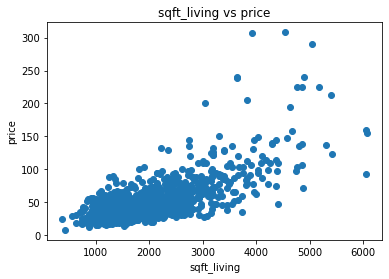

In [ ]:
#relation between sqft_living and house price
ax=plt.axes()
ax.scatter(x='sqft_living',y='price',data=df)
ax.set(xlabel='sqft_living',
       ylabel='price',
       title='sqft_living vs price');

In [ ]:
#replace the null value by zero
df=df.fillna(statas_df.loc['mean'])
df.isnull().sum().sort_values()

bedrooms         0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
sqft_living15    0
price            0
dtype: int64

In [ ]:
#Calculate the skewness value
num_columns=df.select_dtypes('number').columns
skew_limit=0.75
skew_vals=data[num_columns].skew()
print(skew_vals)

bedrooms          0.354236
bathrooms         0.308664
sqft_living       1.247206
sqft_lot          6.080851
floors            0.686188
waterfront       11.056675
view              3.329668
condition         0.835348
grade             0.830892
sqft_above        1.479036
sqft_basement     1.471452
yr_built         -0.544767
yr_renovated      4.634440
zipcode           0.513237
lat              -0.358193
long              0.734047
sqft_living15     1.049913
price             2.974934
dtype: float64


In [ ]:
#sort the column based on their skewnwss value
skew_cols=skew_vals[abs(skew_vals>0.75)].sort_values(ascending=False)
skew_cols

waterfront       11.056675
sqft_lot          6.080851
yr_renovated      4.634440
view              3.329668
price             2.974934
sqft_above        1.479036
sqft_basement     1.471452
sqft_living       1.247206
sqft_living15     1.049913
condition         0.835348
grade             0.830892
dtype: float64

In [ ]:
#Perform the skew transformation for all skew columns
dftrans=df
for col in skew_cols.index.values:
  dftrans[col]=dftrans[col].apply(np.log1p)

In [ ]:
from scipy.stats.mstats import normaltest
normaltest(dftrans.sqft_lot.values)

NormaltestResult(statistic=190.83035082044472, pvalue=3.6451535673288534e-42)

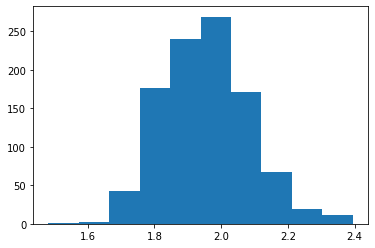

In [ ]:
import matplotlib.pyplot as plt
srqt_price=np.sqrt(df.price)
plt.hist(srqt_price);

In [ ]:
from scipy.stats.mstats import normaltest
normaltest(srqt_price)

NormaltestResult(statistic=19.31758198721726, pvalue=6.386168446184228e-05)

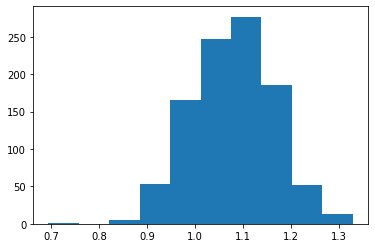

In [ ]:
from scipy.stats import boxcox
bc_result=boxcox(df.price)
bc_price=bc_result[0]
lm=bc_result[1]
plt.hist(bc_price);

In [ ]:
from scipy.stats.mstats import normaltest
normaltest(bc_price)

NormaltestResult(statistic=0.5560889545386263, pvalue=0.7572631397686966)

**Part4:** Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

**Answer:** Summary of three regression methods that we used here are as follows:
- Linear regression: Linear regression assume the linear relationship between input X and output Y. It can be simple or multiple linear regression. It usually use least square error as an cost function.
- Polynomail regression: It uses polynomial features to capture the nonlinear relationship among the data. However, it increases the number of feature in the data set and the model may overfit.
- Ridge, Lesso regression and Elastic net: All these models add the palenty with the cost function to increase the cost and decrease the variance of the model which will remove the overfitting. It shirk the contribution of some of the features in the model by driving to zero. Ridge use L2 norm and Lesso use L1 norm and Elastic net is the combination of both.

To train all the model, we first seperat the traing and test data from the data set. We then standariidized the X_training values and normaalized the y_trainng value of the training data. We then fit X_training and y_training to the model and evalue the performance by X_test and y_test data.

The performance of the Linear regression for normalized training data is better than non-normalized data. We then transform the features to polynomial features for polynomial regression. However, it overfitted with training data. So, we use ridge regression to remove overfitting.

In [ ]:
#import all necessary package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures)

In [ ]:
#load the cleaning set of data
df=data
#replace the null value by zero
statas_df=df.describe()
df=df.fillna(statas_df.loc['mean'])
df.isnull().sum().sort_values()

bedrooms         0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
sqft_living15    0
price            0
dtype: int64

In [ ]:
#Create X and y
X=df.drop('price', axis=1)
y=df['price']
#Train test data split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=323)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(700, 17)
(700,)


In [ ]:
#Standariidized training data
s=StandardScaler()
X_train_s=s.fit_transform(X_train)

In [ ]:
#normalized the y value
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
#y_train_log=np.log1p(y_train)
bc_result=boxcox(y_train)
y_train_bc=bc_result[0]
lm2=bc_result[1]
#print(y_train_bc.shape)
normaltest(y_train_bc)
#plt.hist(bc_y_train);

NormaltestResult(statistic=3.2676334963277105, pvalue=0.19518318557926342)

In [ ]:
#fit a linear model
lr=LinearRegression()
lr.fit(X_train_s, y_train_bc)
X_test_s=s.fit_transform(X_test)
y_pred_bc=lr.predict(X_test_s)

In [ ]:
#Calculate the score
from scipy.special import inv_boxcox
y_pred_trans=inv_boxcox (y_pred_bc,lm2)
r2_score(y_pred_trans,y_test)

0.6827858559698151

In [ ]:
#fit a linear model on original data
lr=LinearRegression()
lr.fit(X_train_s, y_train)
X_test_s=s.fit_transform(X_test)
y_pred=lr.predict(X_test_s)
r2_score(y_pred,y_test)

0.5761163038979009

In [ ]:
#Create X and y
X=df.drop('price', axis=1)
y=df['price']

#Polynomial transformation
pf=PolynomialFeatures(degree=2,include_bias=False)
X_pf=pf.fit_transform(X)

#Train test data split
X_train,X_test,y_train,y_test=train_test_split(X_pf,y,test_size=0.3, random_state=323)

#Standariidized training data
s=StandardScaler()
X_train_s=s.fit_transform(X_train)

In [ ]:
#fit a polynomail model
lr=LinearRegression()
lr.fit(X_train_s, y_train)
X_test_s=s.fit_transform(X_test)
y_pred=lr.predict(X_test_s)
r2_score(y_pred, y_test,)

-0.07891864640631385

**Part5:**A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

**Answer:**
Here are my recommendations:
- Linear regression is more explanable. In Linear regression we can easily idenity which feature are more important in the prediction of housing price. So, if we thin about the explanability then I will suggest to use linear regression model.
- If the focu is on the accuracy of the model, then we should use more complex model such as polynomial regression. However, we should also consider that the model does not become overfit. In this case, we can use ridge or lesso or elastic net model.


**Part6:** Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

**Answer:** All the key findings and insights are as follows:

- All the features in this data set is numeric though different feature has a different range. We bring data feature values in same range.
- There is some skewness in some of the features of the data set. I remove the skewness of those features whose value is higher than 0.75 and then check the normality.
- Calculate the relation of different features with the target variable. Also, calculate the co-relation among the features. Some of the features have linear co-relation, others features' relations are not completely linear. 
- In linear regression, normalized data make the model more effective than non-normalized data.
- Though polynomial feature can improve the model performance, it may overfit the model.
- Model with the regularization  can overcome the overfitting issue.
- For performance complex model is better and for interpretibility it is better to use less complex model. 

**Part7:** Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

**Answer:** Here is the list of suggestions for the next steps in analyzing the data.
- Fix the other structural errors if necessary. For example, rename the feature, take the 2 digit value after the decimal place.
- Reduce the dimension of the data if there are too many features.
- Over-sample the data if there are not sufficient data to train a model. 
- Some model need to be satisfy some pre-condition such as linera relationship between feature and target variable. We need to focus on it too.
- If a feature does not satisfy the pre-condition, we may remove the feature fro the data set and it will have less effect on model performance. 